<a href="https://colab.research.google.com/github/koDELLL/MachineLearning/blob/main/WEEK%206/clusteringweek06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x13       x14       x15       x16       x17  \
0 -0.171128  0.124676  ... -0.156436  0.082245  0.135752 -0.024017 -0.108351   
1 -0.207693  0.170883  ... -0.254341  0.022786  0.163320  0.012022 -0.090974   
2 -0.219153  0.232538  ... -0.237384  0.050791  0.207338  0.083536 -0.050691   
3 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413 -0.050224 -0.136009   
4 -0.172700  0.266434  ... -0.298524  0.037439  0.219153  0.062837 -0.048885   

        x18       x19       x20       

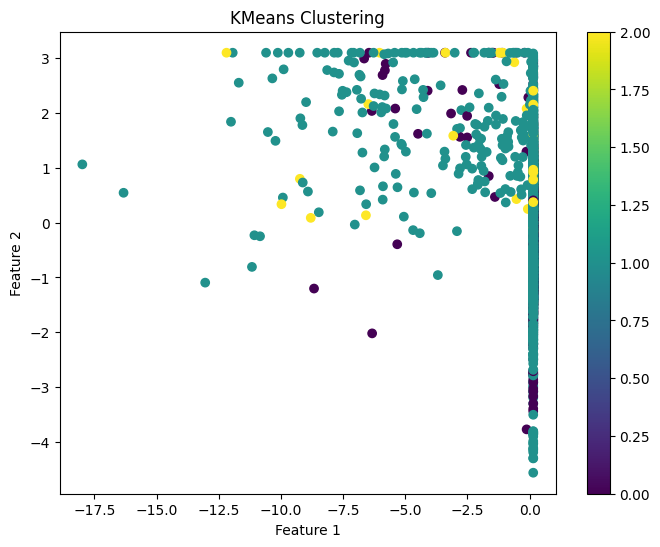

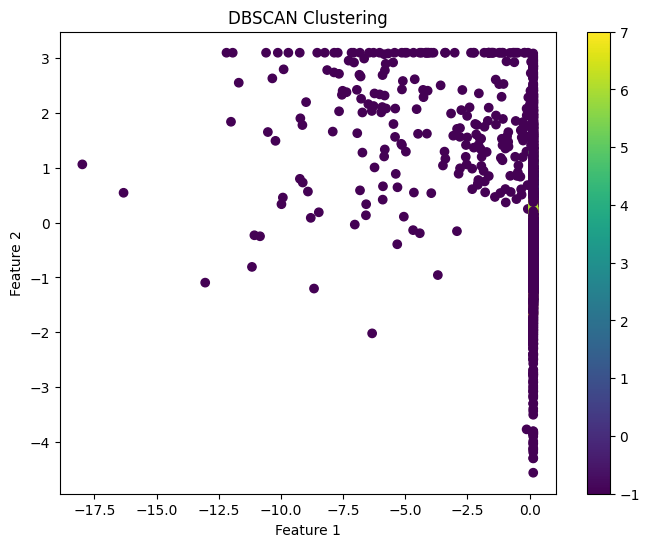

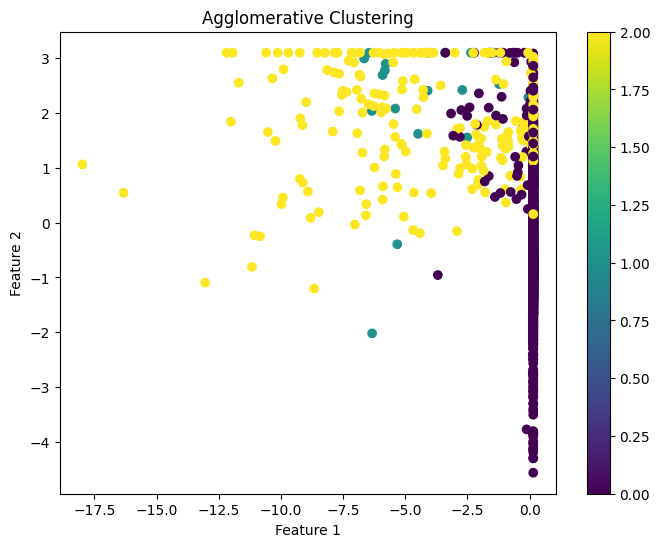

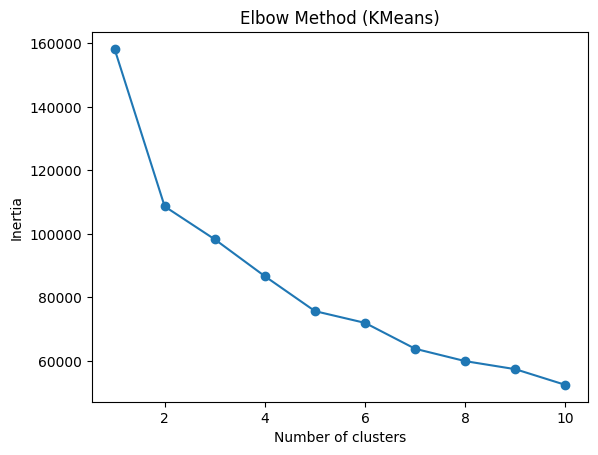

Silhouette Score KMeans: 0.3336517041041939
Silhouette Score DBSCAN: -0.22711928007284996
Silhouette Score Agglomerative Clustering: 0.34917834306499484
                    KMeans    DBSCAN  Agglomerative Clustering
Silhouette Score  0.333652 -0.227119                  0.349178
ARI                    NaN       NaN                       NaN
V-Measure              NaN       NaN                       NaN
Model terbaik berdasarkan evaluasi: Silhouette Score


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Memanggil Dataset dari CSV
# Gantilah dengan path file CSV yang sesuai
file_path = '/content/drive/MyDrive/Dataset ML/clusteringweek06.csv'  # Ganti dengan path dataset Anda

# Memuat dataset dari file CSV
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk melihat struktur data
print(data.head())

# 2. Pisahkan fitur dan target (Jika ada kolom target)
# Jika dataset memiliki kolom target, misalnya 'target', maka kita akan pisahkan fitur dan target.
# Misalnya jika dataset memiliki kolom target, kita bisa pisahkan sebagai berikut:
if 'target' in data.columns:
    X = data.drop(columns='target')  # Menghapus kolom target
    y_true = data['target']  # Menyimpan kolom target
else:
    X = data
    y_true = None  # Tidak ada target karena dataset tidak memiliki label ground truth

# 3. Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Membuat dan Melatih Model Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)
agg_clust = AgglomerativeClustering(n_clusters=3)

kmeans_labels = kmeans.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)
agg_clust_labels = agg_clust.fit_predict(X_scaled)

# 5. Visualisasi Clustering
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

plot_clusters(X_scaled, kmeans_labels, 'KMeans Clustering')
plot_clusters(X_scaled, dbscan_labels, 'DBSCAN Clustering')
plot_clusters(X_scaled, agg_clust_labels, 'Agglomerative Clustering')

# 6. Elbow Method untuk KMeans
def elbow_method(X_scaled):
    inertia = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
    plt.plot(K_range, inertia, marker='o')
    plt.title('Elbow Method (KMeans)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

elbow_method(X_scaled)

# 7. Menghitung Silhouette Score untuk setiap model
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
silhouette_agg = silhouette_score(X_scaled, agg_clust_labels)

print(f"Silhouette Score KMeans: {silhouette_kmeans}")
print(f"Silhouette Score DBSCAN: {silhouette_dbscan}")
print(f"Silhouette Score Agglomerative Clustering: {silhouette_agg}")

# 8. Evaluasi dengan ARI dan V-Measure jika target ada
if y_true is not None:
    ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
    ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)
    ari_agg = adjusted_rand_score(y_true, agg_clust_labels)

    v_measure_kmeans = v_measure_score(y_true, kmeans_labels)
    v_measure_dbscan = v_measure_score(y_true, dbscan_labels)
    v_measure_agg = v_measure_score(y_true, agg_clust_labels)

    print(f"ARI KMeans: {ari_kmeans}")
    print(f"ARI DBSCAN: {ari_dbscan}")
    print(f"ARI Agglomerative Clustering: {ari_agg}")

    print(f"V-Measure KMeans: {v_measure_kmeans}")
    print(f"V-Measure DBSCAN: {v_measure_dbscan}")
    print(f"V-Measure Agglomerative Clustering: {v_measure_agg}")

# 9. Membandingkan hasil evaluasi untuk memilih model terbaik
scores = {
    'KMeans': {
        'Silhouette Score': silhouette_kmeans,
        'ARI': ari_kmeans if y_true is not None else None,
        'V-Measure': v_measure_kmeans if y_true is not None else None
    },
    'DBSCAN': {
        'Silhouette Score': silhouette_dbscan,
        'ARI': ari_dbscan if y_true is not None else None,
        'V-Measure': v_measure_dbscan if y_true is not None else None
    },
    'Agglomerative Clustering': {
        'Silhouette Score': silhouette_agg,
        'ARI': ari_agg if y_true is not None else None,
        'V-Measure': v_measure_agg if y_true is not None else None
    }
}

# Menampilkan hasil evaluasi untuk setiap model
df_scores = pd.DataFrame(scores)
print(df_scores)

# Memilih model terbaik berdasarkan rata-rata dari metrik evaluasi
best_model = df_scores.mean(axis=1).idxmax()
print(f"Model terbaik berdasarkan evaluasi: {best_model}")
